# SIMPLE LINEAR REGRESSION MODEL 

## Import the libraries 

This are the libraries that are used for data analysis and building Algorithms 
- The assignment is to use the data provided to predict the income for canada for the year 2020. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model

### Import the file 

In [3]:
df = pd.read_csv('canada_per_capita_income.csv')  # This formula imports the data in csv format we need for the model 
df.head()                                         #The df.head() by default displays the first 5 rows of the data. 

# Note if you want to view more that the default 5 rows, you can specify that in the brackets e.g df.head(10)-for the first 10rows

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df.tail()    # Displays the last 5 rows of the dataset. 

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


## DATA CLEANING. 
- Before proceeding to creating any models, ensure that the data you are using for the model trainign and prediction does not contain any null values, duplicates etc. 

In [6]:
df.shape    # This will show the number of rows(47) and columns(2) that the dataset has. This will come in handy as you will see.

(47, 2)

In [7]:
df.info()  #The .info() method shows how the data looks like. How many rows per column actually have values in them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [9]:
# For a quick review, you can also find the sum of the null rows for each column using the sum() and isnull() methods. 
# As you can see, the dataset does not contain any null values and as a result, we can proceed with the model training.
df.isnull().sum()   

year                       0
per capita income (US$)    0
dtype: int64

## Visualizations - for the general outlook of the dataset 

To start off the visualizations, you have to have an idea of what exactly you are plotting. 
What you are trying to predict (in this case the Income) should always go on the y- axis and the feature(independent variable) should go on the x-axis. 

Steps to follow:
1. Get an idea of the column names. (In this case they are only two as we are only using the year info to predict the income)

In [11]:
df.columns   # calling .columns will display the names of the columns in the dataset. 

Index(['year', 'per capita income (US$)'], dtype='object')

When working with python, The spaces in (per capita income (US$)) column name will throw an error when trying to plot a scatter plot. This is because variable names should not have spaces. One way to deal with this would be to replace the spaces with an underscore. The syntax would look as shown below. 

db.columns.str.replace(' ', '_')

Alternatively, You can create a list with new column names and assign that to db.columns. Thats the approach i will use for this example. 

In [14]:
col_names = ['year', 'income']  # Alternatively create a list of the new column names and assign them to your new columns 

# However, this can be a bit tedious if you have very many columns in your dataset

In [15]:
df.columns = col_names    # Assign the column names to df.columns 
df.columns

Index(['year', 'income'], dtype='object')

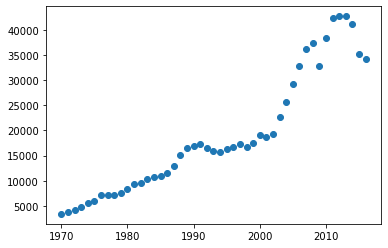

In [16]:
# Now using the new column names, use the matplotlib library to draw the scatter plot. Matplotlib is a visualization library
# The method will require 2 inputs the x and y.  df.year(will display the data for all years) and the same for df.income


plt.scatter(df.year, df.income)

#### The above is the default way the scatter plot appears when drawn. However, as you can see, there are some things that need improvement 

The graph has no title
The x-axis and y-axis are not labelled. It is hard for soeone to tell what is being plotted. 
The style of points and the colors of the graph can also be changed if you dont like the default style too

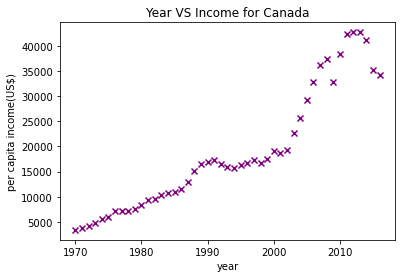

In [17]:
plt.title('Year VS Income for Canada')                           # Will give the graph a title
plt.xlabel('year')                                               # Will label the x-axis
plt.ylabel('per capita income(US$)')                             #Will label the y-axis
plt.scatter(df.year, df.income, color='purple', marker = 'x') #The data on x-axis, y-axis, the color of the points and the style

 From the new improved graph, we can see that the dataset is somewhat good for a linear model/regression model

## MODEL TRAINING AND USING THE MODEL FOR PREDICTION

In [22]:
model = linear_model.LinearRegression()
#What this part of the code does is to select the kind of model we want to use.
#Besides, this will also direct the model what formulas to implement for the model training

## Model Fitting

- When speaking of fitting a model, this is the same as training/teaching a model. So far, we have selected the kind of model(formula) we would like to implement and the next thing is to give it data so it can calculate the line of best fit(refer to blog) and the constant. 
- For this particular model, the model will produce a line that best fits all the data points that we have given it. Using theis line, we can extrapolate it to make predictions. 

In [23]:
model.fit(df[['year']], df.income) 

LinearRegression()

### Model-Prediction

Using the model that has been trained, we can now use that to make predictions 
THINGS TO NOTE:
1. The method from the sklearn library we will use is the predict() that will take an input of what youre trying to predict. 
    For this case, we want to predict the income for the year 2020
2. This will be passed into a numpy array. Which is basically a collection of data. 
3. For this to run, the data has to be in rows and columns. But for now it is only a digit(2020). By calling the .reshape(-1,1),    it will transform this from a single data point to tabular form, which is then in the right format to run in a model. 

In [25]:
model.predict(np.array(2020).reshape(-1,1))  

array([41288.69409442])

#### This model is based on the mathematical formula Y = MX + B
 Y - is the target variable/whatwe are trying to predict , m is the slope/gradient(coefficient) of the graph, X is the independent variable(year) and B is the constant 


In [26]:
model.coef_  # This is the coefficient(slope of the graph)

array([828.46507522])

In [27]:
model.intercept_    # This is the constant

-1632210.7578554575

In [28]:
## To understand how the model came up with the income 
## use the y = mx + c . y represents the income 
income = 828.46507522*2020+-1632210.7578554575
income                                    

41288.694088942604

#### THE MODEL PREDICTS AN INCOME OF 41288.694088942604 FOR 2020. 

## Show the plot complete with the line of best fit generated by the model.

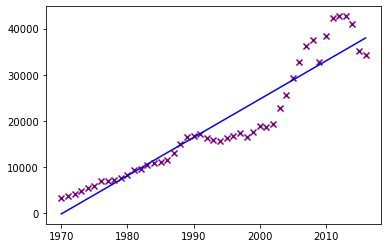

In [30]:
plt.scatter(df.year, df.income, color = 'purple', marker='x')

plt.plot(df.year, model.predict(df[['year']]), color = 'blue' )  
# The inputs above representthe year, and what is predicted by the model.